In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from constants import *
import psana


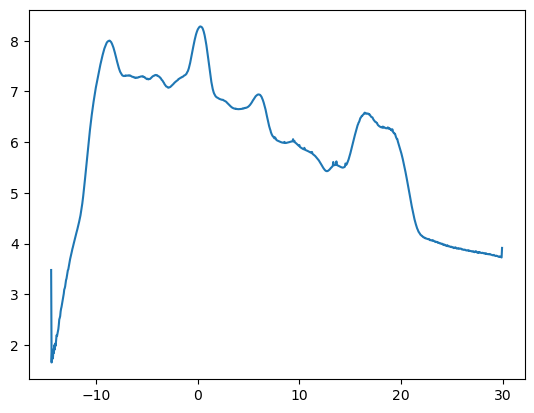

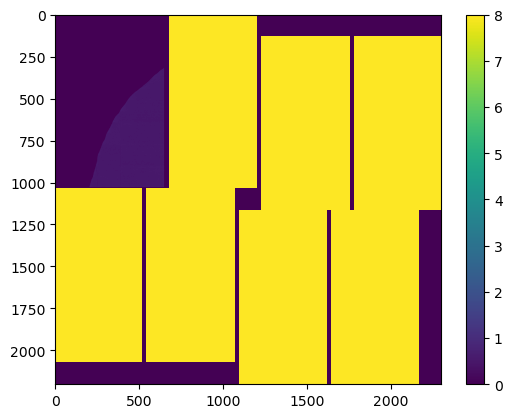

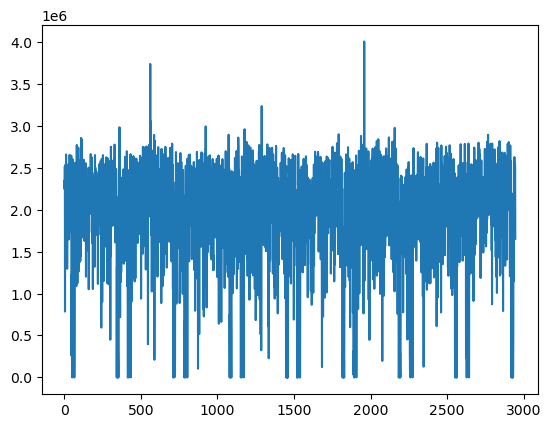

In [3]:

run = 32
ds = psana.DataSource(f'exp={EXP_NAME}:run={run}:smd')
env = ds.env() #not sure what this is or why we load it
det = psana.Detector(DET_NAME, env)
with h5py.File(f'{H5_FOLDER}/r{run}.h5') as f:
    
    run_mean = f['/run_mean'][:]
    run_sigma = f['/run_sigma'][:]
 
    run_intens = f['/run_intens'][:]
    
    pixel_hist = f['/pixel_hist_le30'][:]
    pixel_hist_bins = f['/pixel_hist_bins_le30'][:-1]
 

for evt in ds.events():
    break


#for i in range(8):
#    run_mean[i] += i*1e6



assem_run_mean = det.image(evt, run_mean)
#assem_run_sigma = det.image(evt, run_sigma)

plt.figure()
#plt.plot(pixel_hist)
plt.plot(pixel_hist_bins,np.log10(pixel_hist))


plt.figure()
plt.imshow(assem_run_mean, vmin=0, vmax=8)
plt.colorbar()

plt.figure()
plt.plot(run_intens)